# 第6章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

In [1]:
!pip install gensim

import numpy
import gensim.downloader as api

model=api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


## 50. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ、300次元）をダウンロードし、"United States"の単語ベクトルを表示せよ。ただし、"United States"は内部的には"United_States"と表現されていることに注意せよ。

In [2]:
us = model["United_States"]
print(us)

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 51. 単語の類似度

"United States"と"U.S."のコサイン類似度を計算せよ。

In [3]:
print(model.similarity("United_States", "U.S."))

0.73107743


## 52. 類似度の高い単語10件

"United States"とコサイン類似度が高い10語と、その類似度を出力せよ。

In [4]:
print(model.most_similar(positive=["United_States"], topn=10))

[('Unites_States', 0.7877248525619507), ('Untied_States', 0.7541370987892151), ('United_Sates', 0.7400724291801453), ('U.S.', 0.7310774326324463), ('theUnited_States', 0.6404393911361694), ('America', 0.6178410053253174), ('UnitedStates', 0.6167312264442444), ('Europe', 0.6132988929748535), ('countries', 0.6044804453849792), ('Canada', 0.601906955242157)]


## 53. 加法構成性によるアナロジー

"Spain"の単語ベクトルから"Madrid"のベクトルを引き、"Athens"のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。

In [5]:
print(model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10))

[('Greece', 0.6898480653762817), ('Aristeidis_Grigoriadis', 0.560684859752655), ('Ioannis_Drymonakos', 0.5552908778190613), ('Greeks', 0.545068621635437), ('Ioannis_Christou', 0.5400862097740173), ('Hrysopiyi_Devetzi', 0.5248445272445679), ('Heraklio', 0.5207759737968445), ('Athens_Greece', 0.516880989074707), ('Lithuania', 0.5166865587234497), ('Iraklion', 0.5146791338920593)]


## 54. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし、国と首都に関する事例（`: capital-common-countries`セクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。

In [7]:
!wget http://download.tensorflow.org/data/questions-words.txt

with open("questions-words.txt", "r") as f:
  flag=0
  list=[]
  for line in f:
    if flag==1 and line.startswith(":"):
      break
    if line.startswith(": capital-common-countries"):
      flag=1
      continue
    if flag==1:
      vec1,vec2,vec3,name=line.split()
      predict,score=model.most_similar(positive=[vec2,vec3], negative=[vec1],topn=1)[0]
      list.append((name,predict))
      print(f"答え:{name}\t予想:{predict}({score})")

--2025-05-12 04:00:26--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.64.207, 74.125.126.207, 74.125.132.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.64.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.002s  

2025-05-12 04:00:27 (254 MB/s) - ‘questions-words.txt’ saved [603955/603955]

答え:Iraq	予想:Iraqi(0.635187029838562)
答え:Thailand	予想:Thailand(0.7137669324874878)
答え:China	予想:China(0.7235778570175171)
答え:Germany	予想:Germany(0.6734622716903687)
答え:Switzerland	予想:Switzerland(0.4919748306274414)
答え:Egypt	予想:Egypt(0.7527808547019958)
答え:Australia	予想:Australia(0.583732545375824)
答え:Vietnam	予想:Viet_Nam(0.6276341676712036)
答え:Cuba	予想:Cuba(0.6460990905761719)
答え:Finland	予想:Finland(0.68999844789505)
答え:Pakistan	予想:Pakis

## 55. アナロジータスクでの正解率

54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

In [8]:
count=0

for name,predict in list:
  if name==predict:
    count+=1

print(f"意味的アナロジー:　{count} / {len(list)} ({count/len(list)*100}%)")

意味的アナロジー:　421 / 506 (83.20158102766798%)


## 56. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。

In [10]:
import pandas as pd
from scipy.stats import spearmanr

df=pd.read_csv("combined.csv")
score=[]
human_score=[]

for _,i in df.iterrows():
  w1,w2=i.iloc[0],i.iloc[1]
  human_score.append(i.iloc[2])
  score.append(model.similarity(w1,w2))

rho,_=spearmanr(human_score,score)

print(f"スピアマン相関係数: {rho}")

スピアマン相関係数: 0.7000166486272194


## 57. k-meansクラスタリング

国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

In [11]:
from sklearn.cluster import KMeans
import numpy as np

with open("questions-words.txt", "r") as f:
  flag=0
  list=set()
  for line in f:
    if flag==1 and line.startswith(":"):
      break
    if line.startswith(": capital-common-countries"):
      flag=1
      continue
    if flag==1:
      _,name1,_,name2=line.split()
      list.update((name1,name2))

ans=[]
countryVec = []
for c in list:
  countryVec.append(model[c])

a=np.array(countryVec)
km=KMeans(n_clusters=5, random_state=0)
y_km=km.fit_predict(a)

for i in range(5):
  print(f"クラスタ{i}:")
  for j,k in zip(list,y_km):
    if k==i:
      print(j)
  print("")

クラスタ0:
Finland
Sweden
Norway
Canada

クラスタ1:
Russia
Thailand
Japan
Vietnam
China
Cuba
Egypt

クラスタ2:
Switzerland

クラスタ3:
Iraq
Afghanistan
Pakistan
Iran

クラスタ4:
Australia
Spain
Italy
Greece
Germany
France
England



## 58. Ward法によるクラスタリング

国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。

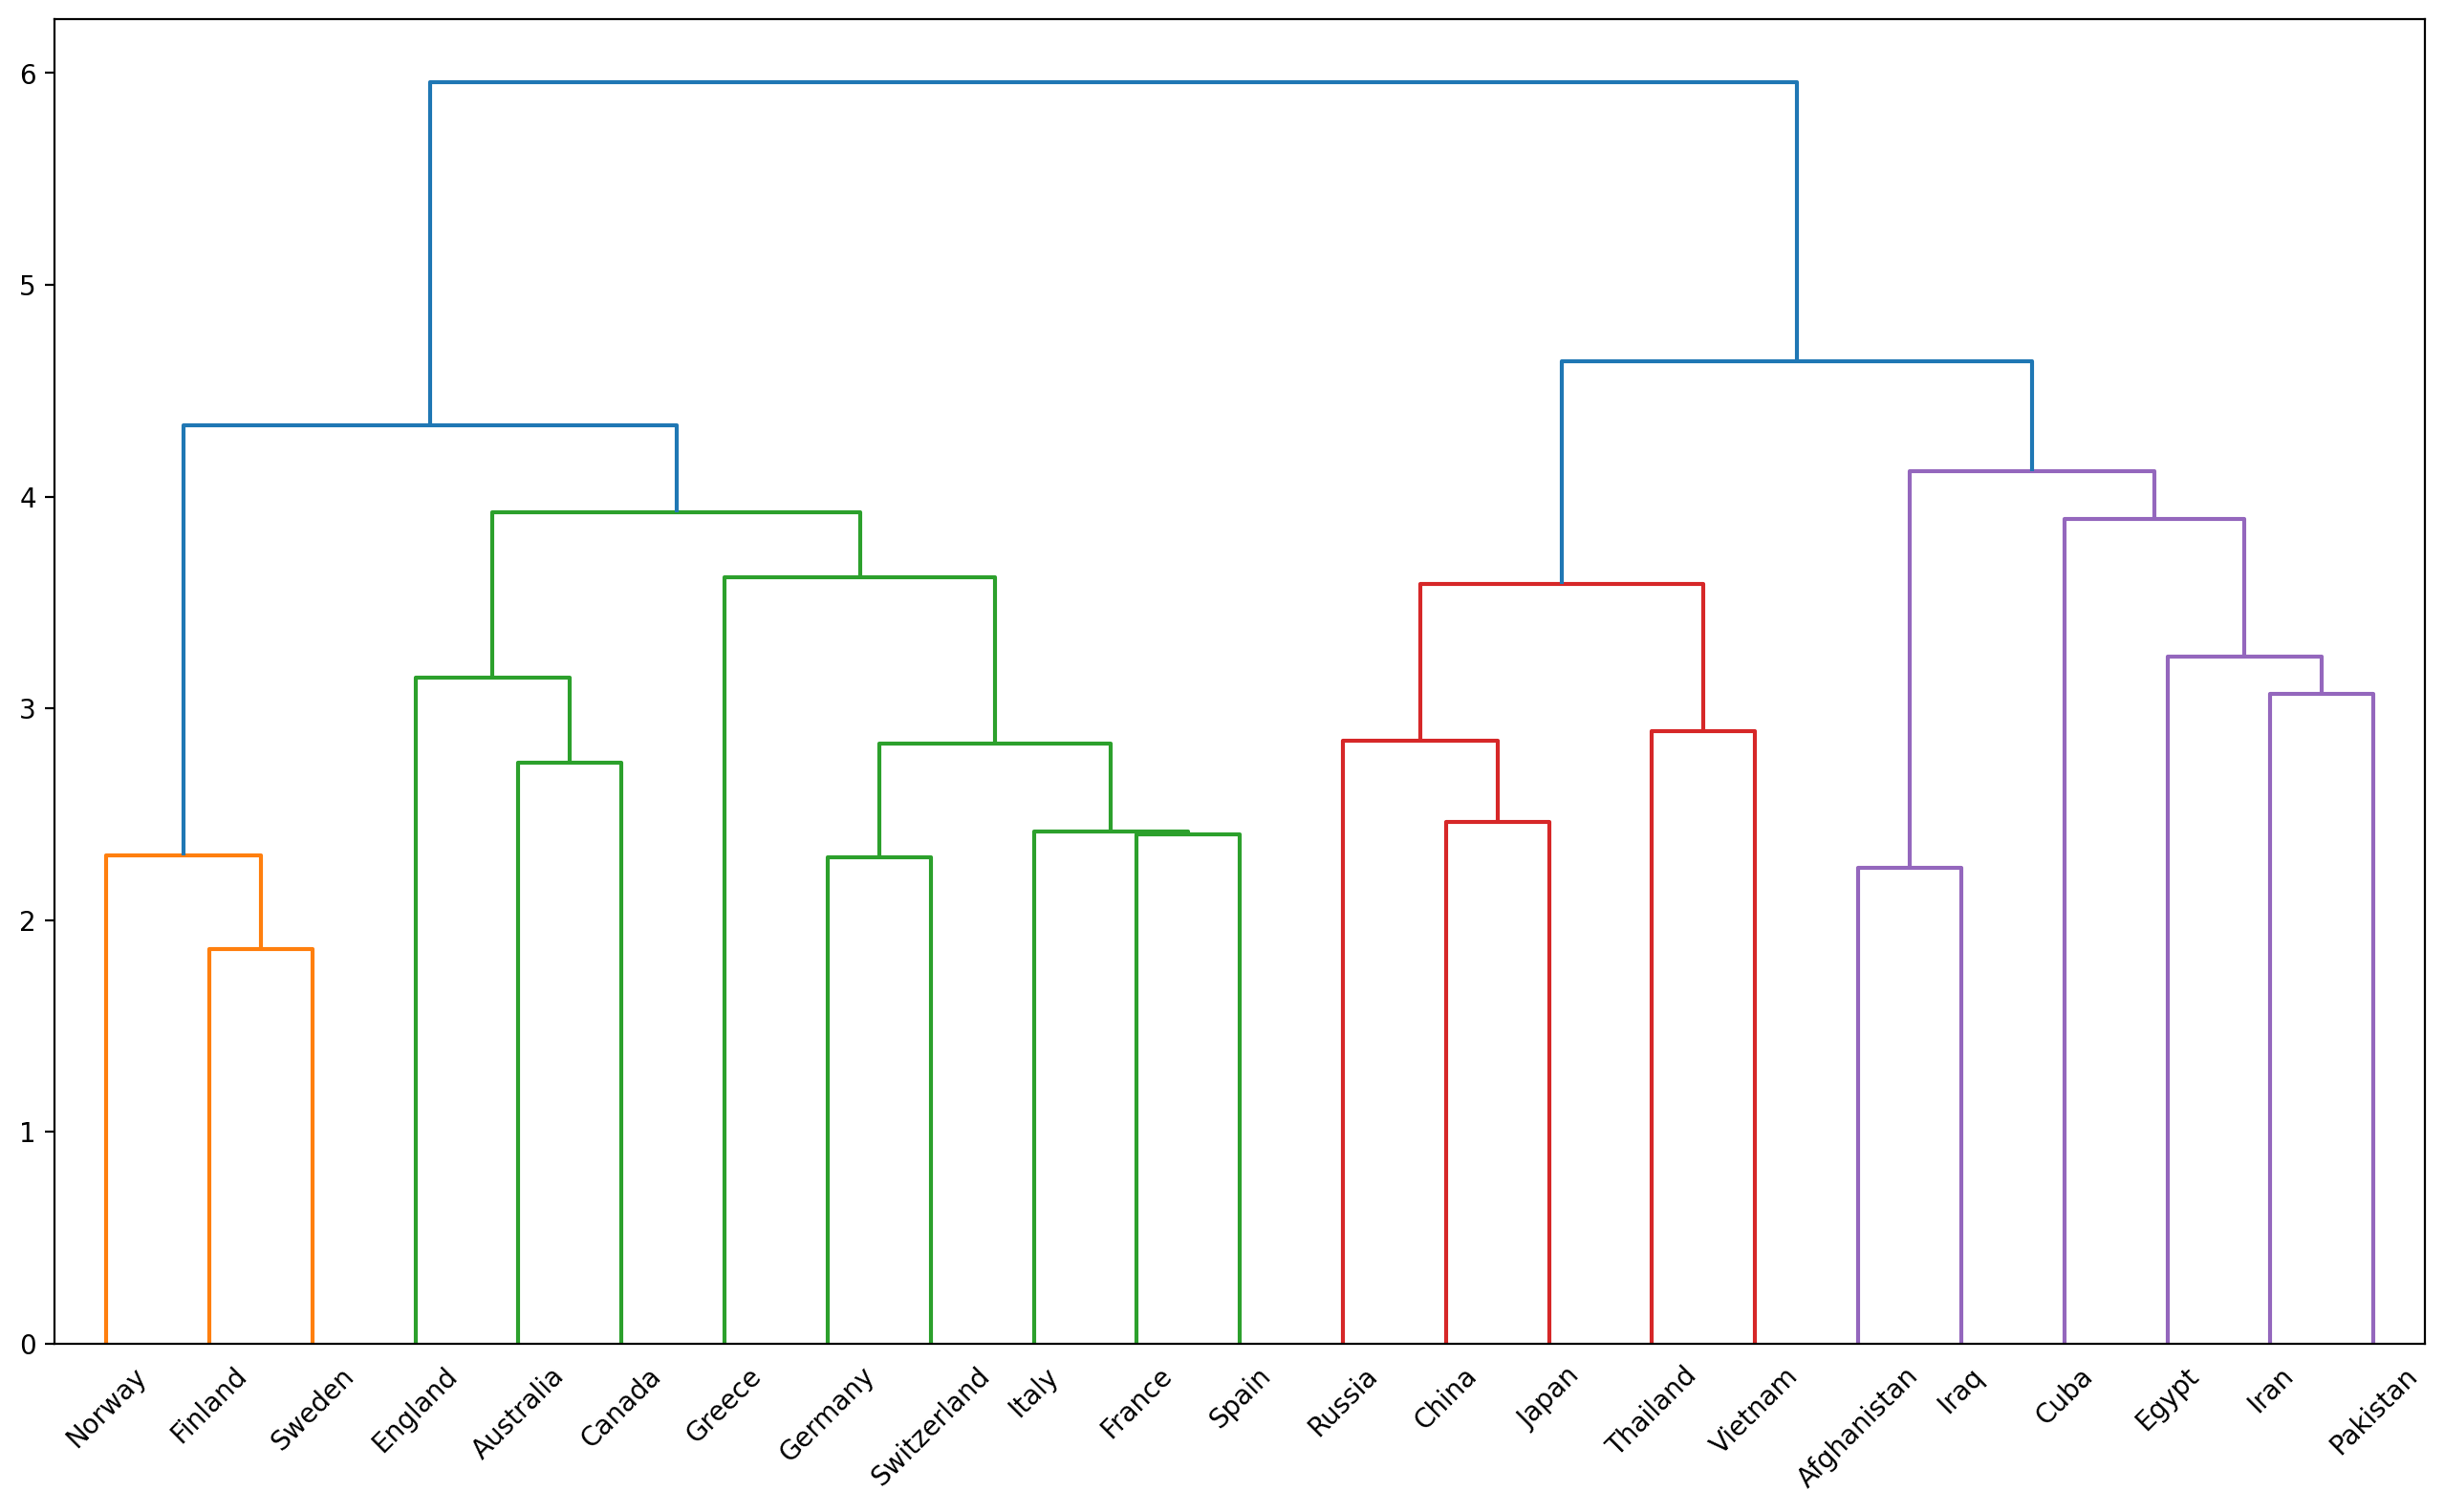

In [12]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

with open("questions-words.txt", "r") as f:
  flag=0
  list=set()
  for line in f:
    if flag==1 and line.startswith(":"):
      break
    if line.startswith(": capital-common-countries"):
      flag=1
      continue
    if flag==1:
      _,name1,_,name2=line.split()
      list.update((name1,name2))

ans=[]
list=sorted(list)
countryVec = []
for c in list:
  countryVec.append(model[c])

X = np.array(countryVec)
linkage_result = linkage(X, method="ward", metric="euclidean")
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor="w", edgecolor="k")
dendrogram(linkage_result, labels=list)
plt.show()

## 59. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。

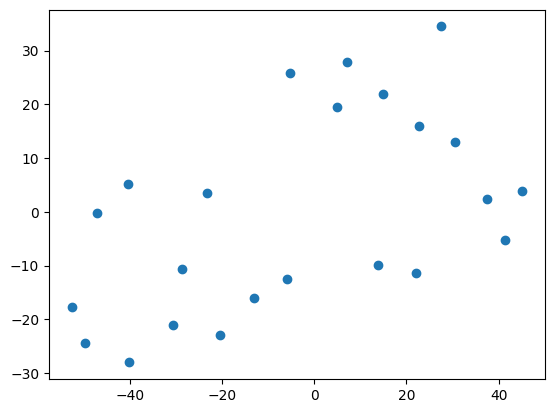

In [13]:
from sklearn.manifold import TSNE

X = np.array(countryVec)
tsne = TSNE(random_state=0, max_iter=15000, metric="cosine",perplexity=5)
embs = tsne.fit_transform(X)
plt.scatter(embs[:, 0], embs[:, 1])
plt.show()